In [72]:
# Import dependencies.
import pandas as pd
import gzip
from os import getcwd, listdir
import random
from IPython.core.interactiveshell import InteractiveShell
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from collections import Counter

color = sns.color_palette()

InteractiveShell.ast_node_interactivity = "last_expr" # "last_expr" or "all"

In [ ]:
# Courtesy to Julian McAuley, assistant professor at USCD.
def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield eval(l)

# Courtesy to Julian McAuley, assistant professor at UCSD.
def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient = 'index')

In [ ]:
# To get a subset of the data: load the whole dataset first, then randomly sample the whole dataset, and get a subset
# of , for example, 100000 observations.

# Windows version.
# reviews_df = getDF("C:\\Users\\m5191\\Downloads\\reviews_Movies_and_TV.json.gz")
# meta_df = getDF("C:\\Users\\m5191\\Downloads\\meta_Moveis_and_TV.json.gz")

# Mac version.
meta_df = getDF("/Users/ray/Desktop/meta_Movies_and_TV.json.gz")
reviews_df = getDF("/Users/ray/Desktop/reviews_Movies_and_TV.json.gz")

In [ ]:
# Randomly select 100000 observations.
random.seed(44)
random_idx = random.sample(range(1, len(reviews_df)+1), 100000)
reviews_subset = reviews_df.iloc[random_idx].reset_index()

# reviews_subset.to_csv(getcwd() + "/amazon_reviews.csv")
# reviews_df.to_csv(getcwd() + "/amazon_reviews_full.csv")
# meta_df.to_csv(getcwd() + "/amazon_meta.csv")

In [2]:
# From now on we work on this subset of the original dataset.
reviews_df = pd.read_csv("amazon_reviews.csv")

# Exploratory Data Analysis

In [13]:
print "The number of different reviewr names in the dataset: {}".format(len(set(reviews_df.reviewerName)))

The number of different reviewr names in the dataset: 77596


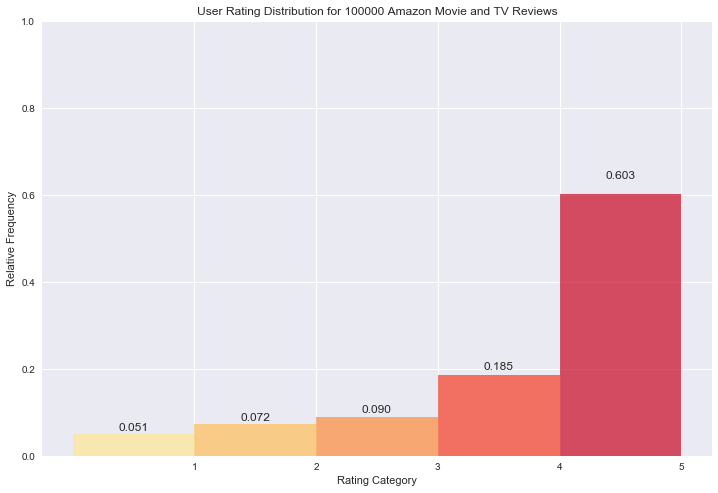

In [93]:
# Plot the user rating distribution.

N_star_categories = 5
colors = np.array(['#E50029', '#E94E04', '#EEC708', '#A5F30D', '#62F610'])
star_labels = np.array([star_label+1 for star_label in range(N_star_categories)])
star_category_dist_fig = plt.figure(figsize = (12, 8))
bar_plot_indices = np.arange(N_star_categories)
star_category_absolute_frequencies = reviews_df.overall.value_counts(ascending = True)
star_category_relative_frequencies = (np.array(star_category_absolute_frequencies)/
                                      float(sum(star_category_absolute_frequencies)))
rects = (plt.bar(bar_plot_indices, star_category_relative_frequencies, width = 1, 
                 color = sns.color_palette("YlOrRd", 5), alpha = .7))

for (idx, rect) in enumerate(rects):
        plt.gca().text(rect.get_x() + rect.get_width()/2., 1.05*rect.get_height(), 
                       '%.3f'%(star_category_relative_frequencies[idx]), ha = 'center', va = 'bottom')

plt.xticks(bar_plot_indices + .5, star_labels)
plt.xlabel('Rating Category')
plt.ylabel('Relative Frequency')
plt.ylim([0, 1])
plt.title('User Rating Distribution for {} Amazon Movie and TV Reviews'.format(len(reviews_df)))

plt.show()

<font size="+0.5">A random subset of the whole dataset shows that the distribution of user ratings is extremely skewed to 5-star rating, which accounts for ~60% of the dataset.</font>

In [102]:
reviewText_df = pd.DataFrame()
reviewText_df["reviewText"] = reviews_df["reviewText"]
reviewText_df["number_of_word"] = reviews_df["reviewText"].apply(lambda x : len(str(x).split()))

word_count = reviewText_df["number_of_word"].value_counts()

review_word_count_dict = dict(reviewText_df["number_of_word"].value_counts())

print("The frequency for the number of words that are no more than 300 is {}"
      .format(len({key: value for key, value in review_word_count_dict.items() if value <= 50})))

The frequency for the number of words that are no more than 300 is 991


In [103]:
review_word_count_dict = {key: value for key, value in review_word_count_dict.items() if value > 50}

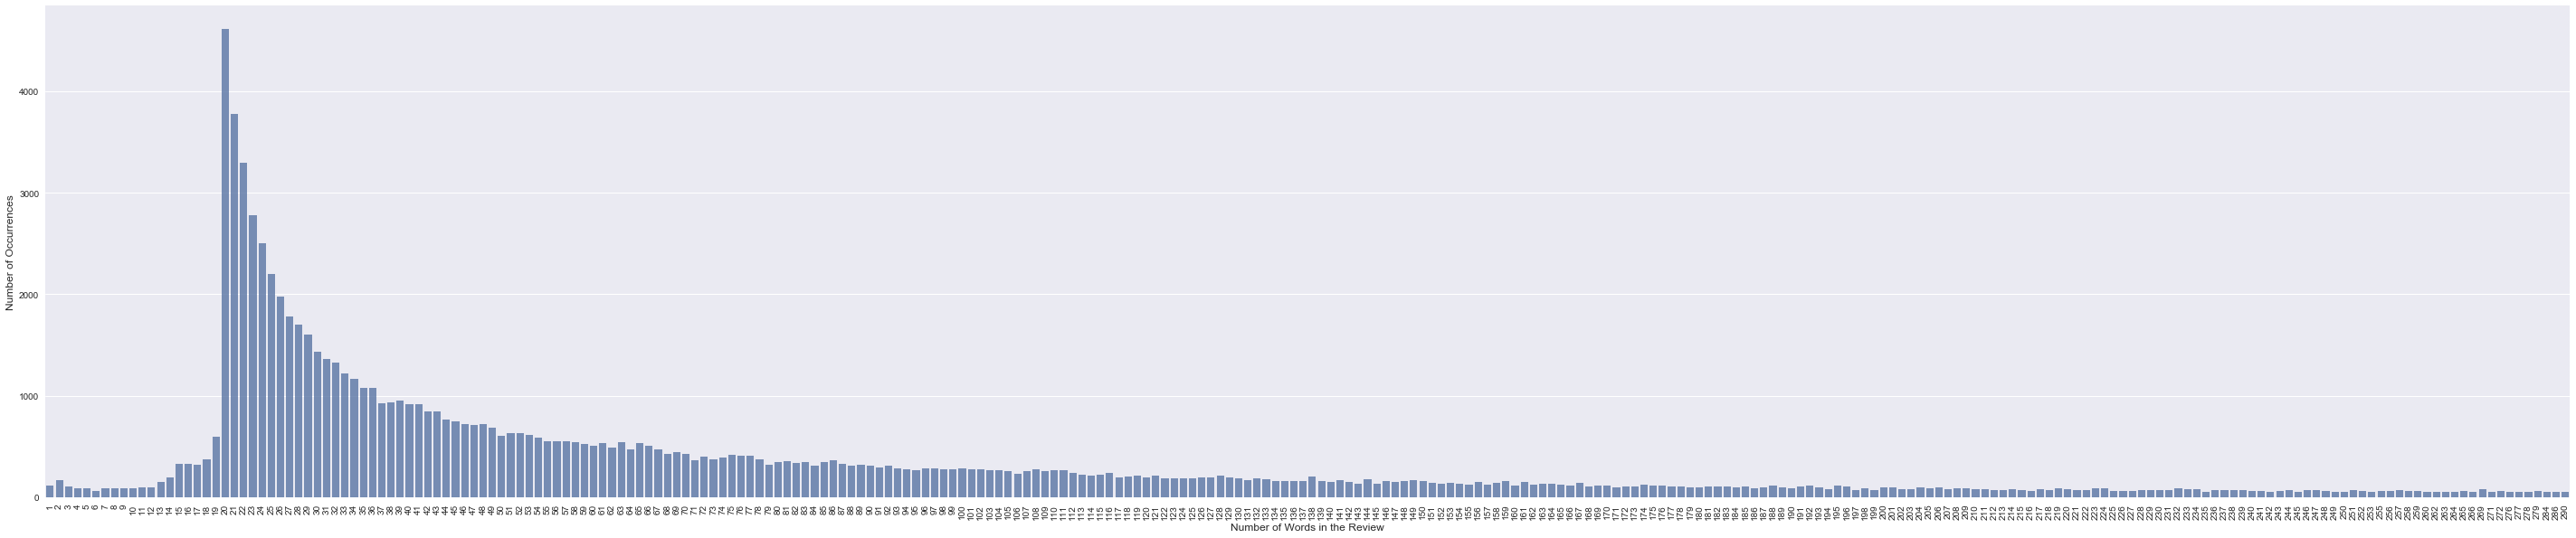

In [104]:
# Plot the distribution of the number of words for each review.

plt.figure(figsize = (50, 10))
sns.barplot(review_word_count_dict.keys(), review_word_count_dict.values(), alpha = 0.8, color = color[0])
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.xlabel('Number of Words in the Review', fontsize = 12)
plt.xticks(rotation = 90)
plt.show()